# Introduction to Image and Video Processing
## Project 01, Spatial Filtering & Processing

Made by: Jorge Villarreal <br>
Date: 04/15/22 <br>
Lecturer: Alexia Briassouli <br>

Basic imports that are needed to complete the project:

In [ ]:
%matplotlib inline
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from skimage.color import rgb2hsv
from scipy import fftpack, ndimage
from skimage.util import random_noise
import warnings
warnings.filterwarnings('ignore')

##  <span style='font-family:Helvetica'>**1.- COLOR SPACES**

### **<span style='font-family:Helvetica'><span style='color:black'> We will be using two images (one with <span style='color:orange'>bright colors</span> and the other one with <span style='color:pink'>pale colors</span>) to conduct this exercise. The images I've chosen were downloaded from google</span>.**


In [392]:
# let's first import the images into the notebook
bright_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/01_ColoredObjects.jpg")
pale_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/01_PaleColors.jpg")

#### <span style='font-family:Helvetica'>1. Transform your images from RGB to HSV and display your results. Explain the appearance of each color component with respect to your image structure and colors.

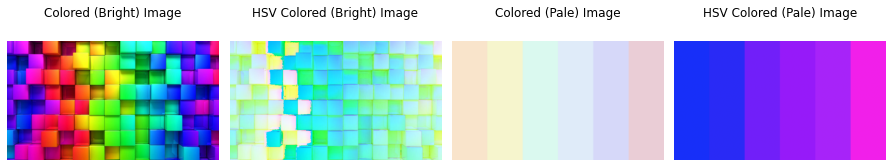

In [393]:
# Use the function rgb2hsv to quickly do this transformation
bright_image_hsv = rgb2hsv(bright_image)
pale_image_hsv = rgb2hsv(pale_image)

# Create subplot frame for the images
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12.5, 5))

# Configure the images in the subplot frame
ax0.imshow(bright_image)
ax0.set_title("Colored (Bright) Image")
ax0.axis('off')
ax1.imshow(bright_image_hsv, cmap='hsv')
ax1.set_title("HSV Colored (Bright) Image")
ax1.axis('off')
ax2.imshow(pale_image)
ax2.set_title("Colored (Pale) Image")
ax2.axis('off')
ax3.imshow(pale_image_hsv, cmap='hsv')
ax3.set_title("HSV Colored (Pale) Image")
ax3.axis('off')

#This just makes it look way nicer than without it
fig.tight_layout()

From the images above, we can see how the transformation for both images looks. They went from RGB to HSV. Remember HSV stands for Hue, Saturation and Value. HSV is trying to 'represent' how colors appear under light.  
* **Hue** is there to tell us what color are we looking at exactly. If we would like to extract a specific color from the images, we would need to play with the hue value.  
* **Saturation** tells us how much of the color(s) we are actually looking at. So, for example, if we wanted to see the colors very intense, we would pump the saturation to its maximum value.  
* **Value**. You can look at value as if you were shining a light to the image. The more value, the more light the object is reflecting.  

With that said, we can conclude that the <span style='color:orange'>**bright_image**</span> is 'reflecting'a lot of light whilst the <span style='color:pink'>**pale_image**</span> isn't. This is why we see a darker <span style='color:pink'>**pale_image**</span> and a brighter <span style='color:orange'>**bright_image**</span>

#### 2. Transform the <span style='color:gray'>RGB</span> images to an intensity image <span style='color:lightblue'>"I"</span> in <span style='color:blue'>HSI</span> space and an intensity image <span style='color:violet'>"V"</span> in <span style='color:purple'>HSV</span> space. Display the resulting images and explain their appearance and their differences. 
    
* <span style='color:gray'>For this exercise you ***cannot*** use inbuilt functions. You should find the formulas connecting RGB, I, V and use them.</span>

We will start by creating functions for these two requests. For the I value from HSI, let's separate the bright image by color channels and get the corresponding values. Then we will get the intensity by summing and dividing all of the values by 3. I will create a formula to do that. Next, we will create a formula to get the V value from HSV. We will first separate the image by R G B and then divide each by 255. After that is done, we will calculate the MAX value from R', G' & B'. And that will be our "V".  We will then proceed to use both formulas on both images.

In [394]:
def rgb_to_i (image):
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]
    intensity = (r+g+b)/3
    return intensity    

In [395]:
def rgb_to_v (image):
    r = image[:, :, 0]
    g = image[:, :, 1]
    b = image[:, :, 2]
    r_prime = r/255
    g_prime = g/255
    b_prime = b/255
    cmax = np.maximum(np.maximum(r_prime, g_prime), b_prime) #We calculate the max value in 2 steps
    value = cmax
    return value

Bright Colored Images


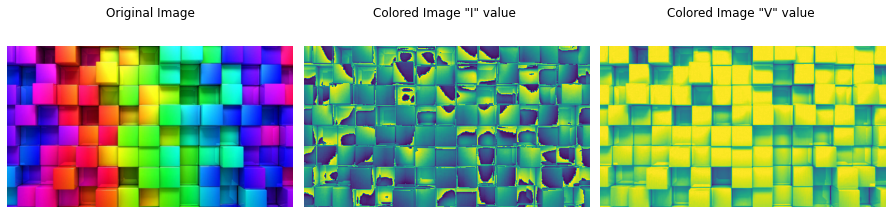

In [396]:
intensity_bright = rgb_to_i(bright_image)
value_bright = rgb_to_v(bright_image)

print("Bright Colored Images")

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12.5, 5))

ax0.imshow(bright_image)
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(intensity_bright)
ax1.set_title('Colored Image "I" value ')  
ax1.axis('off')
ax2.imshow(value_bright)
ax2.set_title('Colored Image "V" value ')  
ax2.axis('off')

fig.tight_layout()

Pale Colored Images


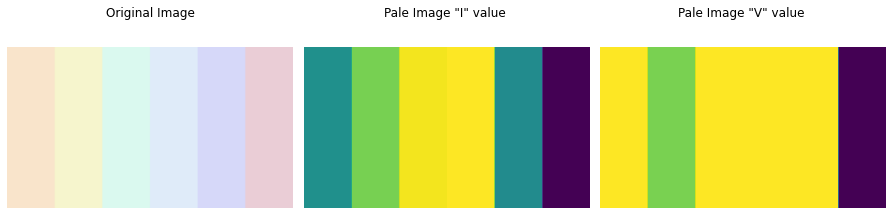

In [397]:
intensity_pale = rgb_to_i(pale_image)
value_pale = rgb_to_v(pale_image)

print("Pale Colored Images")

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(12.5, 5))

ax0.imshow(pale_image)
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(intensity_pale)
ax1.set_title('Pale Image "I" value ')  
ax1.axis('off')
ax2.imshow(value_pale)
ax2.set_title('Pale Image "V" value ')  
ax2.axis('off')

fig.tight_layout()

##  <span style='font-family:Helvetica'>**2.- PONTWISE TRANSFORMS, HISTOGRAM EQUALIZATION**

### Choose two grayscale images, one with high contrast and one with low contrast.


In [398]:
lowcontrast_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/02_LowContrast.jpg")
highcontrast_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/02_HighContrasts.jpg")

#### 1. Find the histograms of the two images and display them. You can use inbuilt functions. Explain their distribution and how it is related to your original images' appearance.


In [399]:
#Using the marvelous built-in functions:
hist_low = cv2.calcHist([lowcontrast_image], [0], None,[256],[0,256])
hist_high = cv2.calcHist([highcontrast_image], [0], None,[256],[0,256])

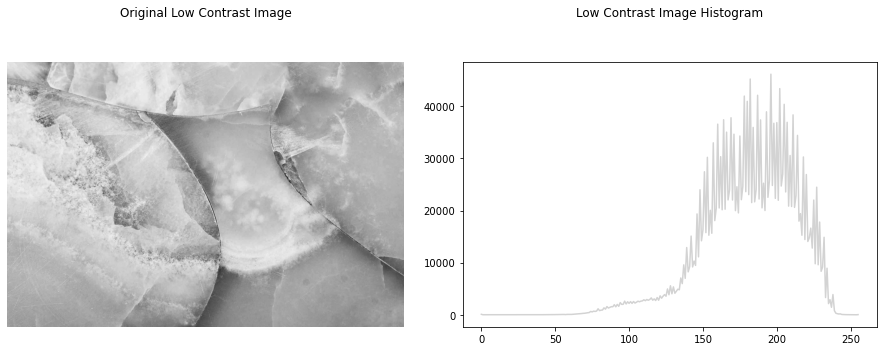

In [400]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

plt.rcParams['axes.titley'] = 1.15
ax0.imshow(lowcontrast_image)
ax0.set_title("Original Low Contrast Image")
ax0.axis('off')
ax1.plot(hist_low, color="lightgray")
ax1.set_title('Low Contrast Image Histogram')  
ax1.axis('on')

fig.tight_layout()

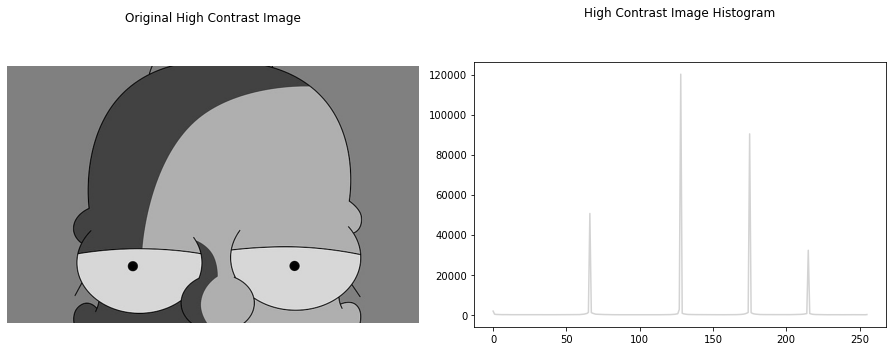

In [401]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

plt.rcParams['axes.titley'] = 1.15
ax0.imshow(highcontrast_image)
ax0.set_title("Original High Contrast Image")
ax0.axis('off')
ax1.plot(hist_high, color="lightgray")
ax1.set_title('High Contrast Image Histogram')  
ax1.axis('on')

fig.tight_layout()

We can see from the histograms that the values that are displayed in them basically mean **how <span style='background:black'><span style='color:white'>'white'</span></span> or 'black'** the image is. From the first image we can see that we have a lot of white. The histogram really shows that. The plot is telling us that the image only contains about 4 shades of gray.

#### 2. Transform your images with the negative pointwise transform ***without using inbuilt functions***. Display and explain your results.

We need to get the shape of our image and then iterate over every single pixel on the array to do what the formula indicates (remember S=L-1-r). After that, we will get the single pixel and substract the color values in each channel from RGB. After that, store the pixel again in where it was. 

In [402]:
def negative_transform (image):
    
    forneguse = image
    height, width, _ = forneguse.shape
    
    for i in range(0, height - 1):
        for j in range(0, width - 1):

            pixel = forneguse[i, j]

            pixel[0] = 255 - pixel[0]          
            pixel[1] = 255 - pixel[1]         
            pixel[2] = 255 - pixel[2]

            forneguse[i, j] = pixel      
    return forneguse

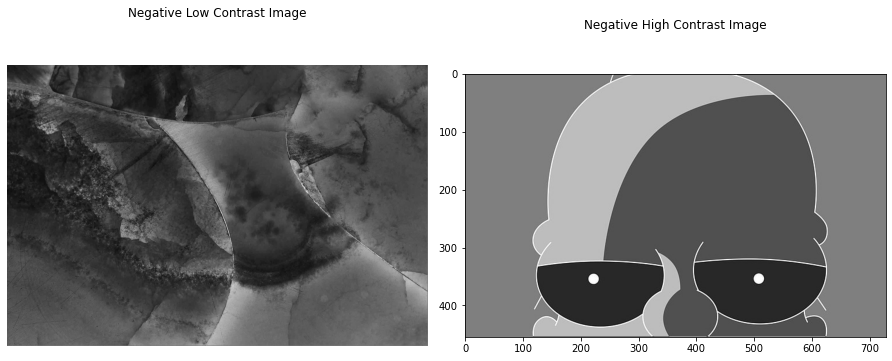

In [403]:
negative_lowcontrast = negative_transform(lowcontrast_image)
negative_highcontrast = negative_transform(highcontrast_image)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(negative_lowcontrast)
ax0.set_title("Negative Low Contrast Image")
ax0.axis('off')
ax1.imshow(negative_highcontrast)
ax1.set_title('Negative High Contrast Image')  
ax1.axis('on')

fig.tight_layout()

As it can be seen from the images, the color have basically flipped. Where there was black is now white and viceversa (just look at homer's eyes)!

#### 3. Find the histograms of the "negative" images and display them. Explain how and why they are different or similar to the original images' histograms.

We've previously used this, now let's merge the previous histograms with the new ones...

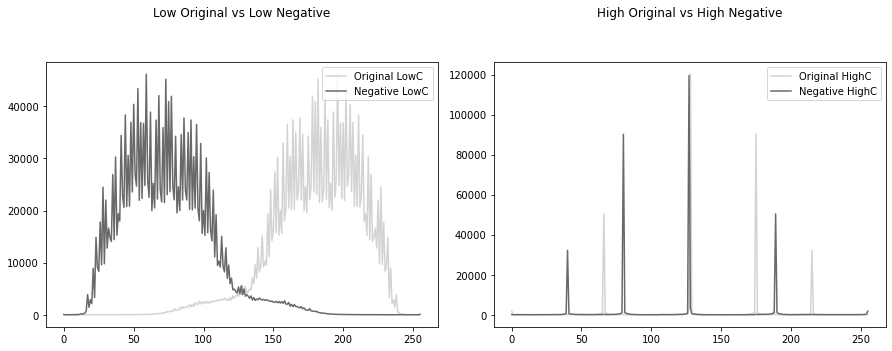

In [404]:
hist_low_negative = cv2.calcHist([negative_lowcontrast], [0], None,[256],[0,256])
hist_high_negative = cv2.calcHist([negative_highcontrast], [0], None,[256],[0,256])

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.plot(hist_low, color = 'lightgray', label ='Original LowC')
ax0.plot(hist_low_negative, color = 'dimgray', label ='Negative LowC')
ax0.set_title("Low Original vs Low Negative")
ax0.legend(loc="upper right")
ax0.axis('on')

ax1.plot(hist_high, color = 'lightgray', label ='Original HighC')
ax1.plot(hist_high_negative, color = 'dimgray', label ='Negative HighC')
ax1.set_title("High Original vs High Negative")
ax1.legend(loc="upper right")
ax1.axis('on')

fig.tight_layout()

Like we said on the previous question, the values are now **flipped**! The histograms are basically mirrored (*even the colors!*). Now, the **<span style='background:black'><span style='color:white'>high values</span></span>** are **low** and the **low values** are now **<span style='background:black'><span style='color:white'>high</span></span>**. For the Homer (high contrast) image, look at how the middle value practically didn't change. If you actually go back and watch both images, you'll see that the color doesn't change!

#### 4. Create a power law pointwise transform that transforms pixel intensity values from r to s using s = rn. Use the resulting power law transform to convert the high contrast image to a lower contrast one or vice versa (you can choose which of the two). To do this you have to find a value n for the power that is bigger or smaller than 1 (you have to find which). Display your results and explain how it works.

Let's create a basic formula. The gamma_variable is what will help us compensate the non-linearity of the image. We first need to reload the image as it was previously transformed

In [405]:
highcontrast_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/02_HighContrasts.jpg")

In [406]:
def gamma_adjust (image,gamma_value):
    plawp = np.array(255*(image / 255) **gamma_value, dtype = 'uint8')
    return plawp

<function matplotlib.pyplot.show(close=None, block=None)>

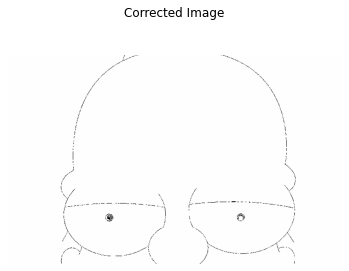

In [407]:
plawp = gamma_adjust (highcontrast_image,.001)

#And now to see the newly created image...
plt.imshow(plawp)
plt.title("Corrected Image")
plt.rcParams["figure.figsize"] = (5,5)
plt.axis('off')
plt.show

As we can see,we got rid of almost all of the contrast from this image. We now only have a sketch of what Homer Simpson used to be. But what happened? Well, by playing with gamma_variable, we can choose the itensity that we desire for the pixels of the image. If the value is equal to 1, then you would not be doing anything. But when the value of gamma is more than 1, your pixel's intensity would decrease. On the other hand, if the value is less than 1, your intensity increases.

In other words:
* Gamma > 1 --> decreased intensity --> **<span style='color:dimgray'>darker image</span>**
* Gamma < 1 --> increased intensity --> **<span style='color:lightgrey'>lighter image</span>**

##  <span style='font-family:Helvetica'>**3.- SPECIAL EFFECTS**

### Choose an image with strong circular and straight features.

We will first begin by importing the selected image and (becuse of how this image is setup) re-arrange the channels from rgb to bgr.

In [408]:
strong_image = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/03_CircularnStraight.jpg")
b,g,r = cv2.split(strong_image)
strong_image = cv2.merge([r,g,b])     

#### 1. Convert your image into polar coordinates and display it. Explain its appearance.

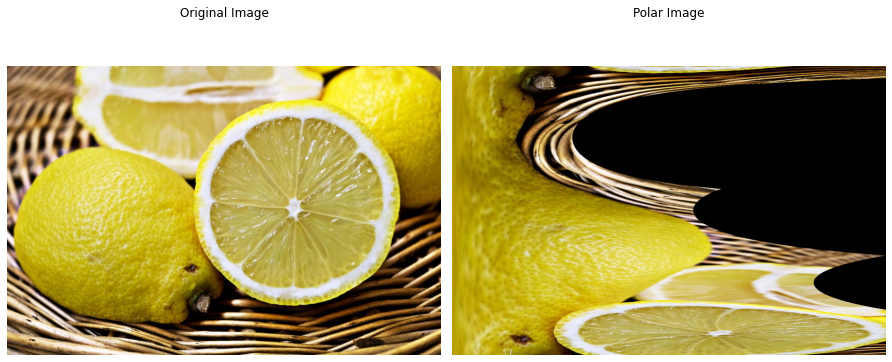

In [409]:
value = np.sqrt(((strong_image.shape[0]/2.0)**2.0)+((strong_image.shape[1]/2.0)**2.0))
#We now apply the inbuilt function from CV...
strong_polar_image = cv2.linearPolar(strong_image,(strong_image.shape[0]/2, strong_image.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(strong_image)
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(strong_polar_image)
ax1.set_title('Polar Image')  
ax1.axis('off')

fig.tight_layout()

This sunset image has clearly been transformed to a polar coordinate image. *But what is all this nonsense that is happening in the screen?* Well, we basically **took a point** in the image and **made that the center**.If we wanted to we could now give directions towards the sun (in the sense of **length and angle**) to travel (this is heavily used in navigation, for example). In other words, you now have in straight lines the **hypothenuse** of the center point you chose in the image. There is no need for pythagoras theorem now.

#### 2. Cartoonify your image by creating a program that creates a black outline around the shapes and fills in the colored areas with a uniform color. You can choose what method(s) you will use to do this (more than one way). Explain your work.

We can start by creating a function that detects the edges around the shapes in the image. Convert the image to grayscale to identfy these edges better and to reduce the noise (as suggested in the slides). After that, we use cv2's adaptive threshold function to identify the lines. This basically takes each pixel and gets an idea of what the surrounding area of that pixel is to decide how to color it. Different thresholds for different regions.

In [410]:
def edge_detect(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, 7)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 5)
  return edges

Now that we've created a function that will (as I like to say) "pop out" the edges, we now need a function that will uniformly color the image. This will be done through several of cv's formulas. Mainly, K-clustering for color quantization. Apart from creating a cartoony look, we also use this technique to reduce memory usage when processing images. In the function below, k will allow us to select how many different colors we want.

In [411]:
def cartoon_image(image, k):
  changed_image = np.float32(image).reshape((-1, 3))
  specs = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
  compactness, label, center = cv2.kmeans(changed_image, k, None, specs, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  almost_cartoon_image = center[label.flatten()]
  cartoon_image_noblur = almost_cartoon_image.reshape(image.shape)
  cartoon_image = cv2.bilateralFilter(cartoon_image_noblur, d=7, sigmaColor=200,sigmaSpace=200)
  return cartoon_image

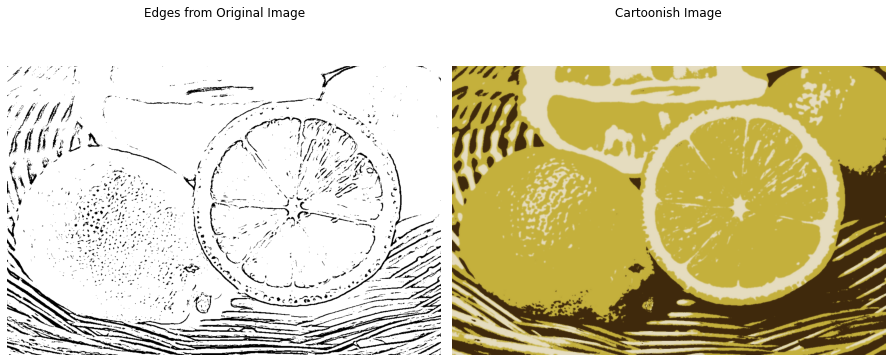

In [412]:
strong_image_edges = edge_detect(strong_image)
cartoon_image = cartoon_image(strong_image,3)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(strong_image_edges, cmap='gray')
ax0.set_title("Edges from Original Image")
ax0.axis('off')
ax1.imshow(cartoon_image)
ax1.set_title('Cartoonish Image')  
ax1.axis('off')

fig.tight_layout()

Great! We now have our edges and our almost cartoon image. We now need to combine both images together to create a single image that will have the darker edges as well as the cartoonifies appearance. Fortunately, there is an inbuilt function from the OpenCV package called cv2_bitwise_and.

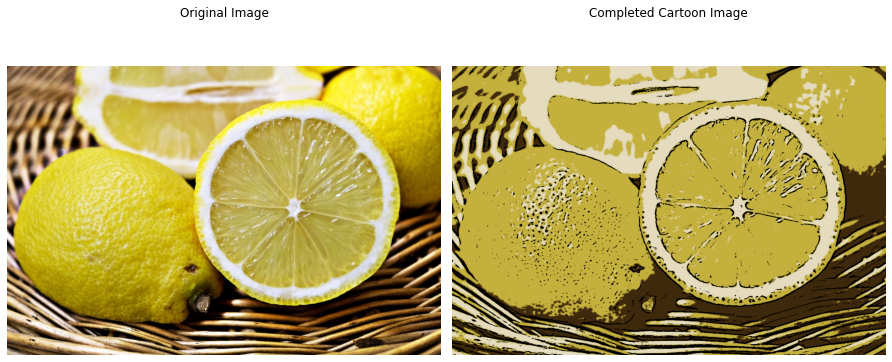

In [413]:
cartoonified_image = cv2.bitwise_and(cartoon_image, cartoon_image, mask=strong_image_edges)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(strong_image)
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(cartoonified_image)
ax1.set_title('Completed Cartoon Image')  
ax1.axis('off')

fig.tight_layout()

##  <span style='font-family:Helvetica'>**4.- FREQUENCY DOMAIN PROPERTIES**

### Choose an image of your liking

In [414]:
image_of_liking_4 = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/04_Imageofliking.jpg")
b,g,r = cv2.split(image_of_liking_4)
image_of_liking_4 = cv2.merge([r,g,b])

#### 1. Apply a visible translation to it in the spatial domain. For example, a 586 x 880 image of a kitten translated only horizontally by 200 pixels (you can use other kinds of padding if you prefer). 


(-0.5, 2219.5, 1079.5, -0.5)

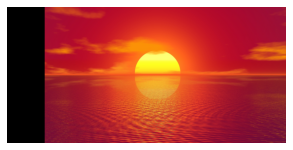

In [415]:
image_of_liking_padded = cv2.copyMakeBorder(image_of_liking_4, 0, 0, 300, 0, cv2.BORDER_CONSTANT)

plt.imshow(image_of_liking_padded)
plt.axis("off")

With the use of the **copyMakeBorder** function from opencv, I've created a border around the image. I've chosen this border to be with the argument of cv2.BORDER_CONSTANT which, makes a constant value of **0**. This will make the border have a **black** color.

#### 2. Calculate the 2D FFT of the translated image. Display the original and degraded images' FT magnitudes. Do they look the same or dIfferent? Explain why, based on properties of the FT.

We will create two formulas. One 

In [416]:
#gray = cv2.cvtColor(image_of_liking_4, cv2.COLOR_BGR2GRAY) <--- Here for testing purposes
def twod_fft (image):
    image_of_liking_4_2fft = np.fft.fft2(image)
    fshift = np.fft.fftshift(image_of_liking_4_2fft)
    result = np.where(fshift > 0.0000000001, fshift, -10) #This line is specifically getting rid of an error for diving 0s
    magnitude_spectrum = (20*np.log(np.abs(result))).astype(int)
    return magnitude_spectrum

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


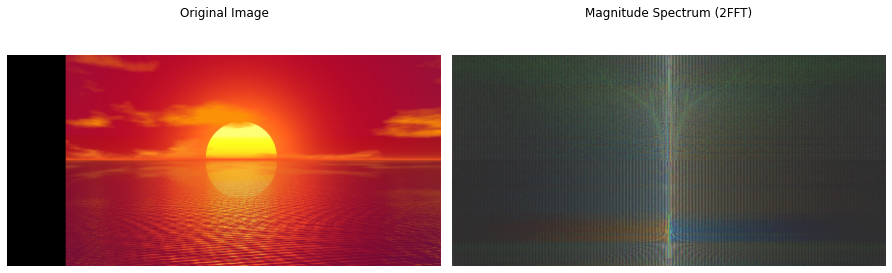

In [417]:
twodfft_image = twod_fft(image_of_liking_padded)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(image_of_liking_padded)
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(twodfft_image)
ax1.set_title('Magnitude Spectrum (2FFT)')  
ax1.axis('off')

fig.tight_layout()

We can see in the 2FFT spectrum how the image looks. But, how does this look exactly when plotting it? Well, below you will see a 3D plot that will specifically show the magnitud spectrum. This plot can be rotated by playing with the (ax.view_init) parameters. The idea behind this is to see the magnitude spectrum in a 3D space. I will create two lines with the exact code. One of the lines will pop a window that will enable the user (you!) to rotate and play with the 3D plot. The other one, will stay here in the notebook.

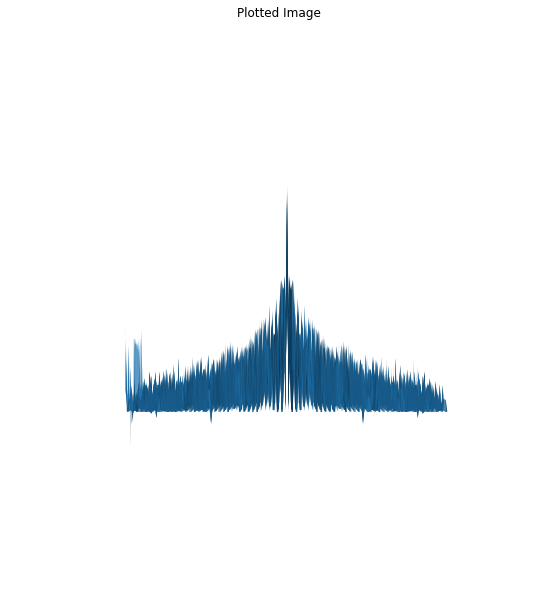

In [418]:
%matplotlib inline
gs_twodfft2_image = np.mean(twodfft_image,-1)

plt.rcParams['figure.figsize'] = [10,10]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
X,Y = np.meshgrid(np.arange(1, np.shape(gs_twodfft2_image)[1]+1), np.arange(1,np.shape(gs_twodfft2_image)[0]+1))
ax.plot_surface(X[0::10, 0::10],Y[0::10,0::10], 256-gs_twodfft2_image[0::10,0::10], edgecolor ='none')
ax.set_title('Plotted Image')
ax.mouse_init()
ax.view_init(180,270)
ax.axis('off')
plt.show()

In [419]:
#repeated line of code that will pop a window...
%matplotlib qt

B = np.mean(twodfft_image,-1)

plt.rcParams['figure.figsize'] = [10,10]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
X,Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10, 0::10],Y[0::10,0::10], 256-B[0::10,0::10], edgecolor ='none')
ax.set_title('Plotted Image')
ax.mouse_init()
ax.view_init(180,270)
ax.axis('off')
plt.show()

Images have pixels that are more intense and others that are less intense. Images have details in every pixel. But, some pixels don't 'add' to the value of the image. The FFT tries to separate these intense values from the non intense values. This allows devices like your phone to store images without consuming a lot of memory. A reverse fft happens when opening that image to see it. That is, in a sense, what JPEG images do! 

##  <span style='font-family:Helvetica'>**5. PERIODIC NOISE REMOVAL**

### Choose an image of your liking

In [420]:
image_of_liking_5 = cv2.imread("C:/Users/Jorge Villarreal/IIVP/Images for IIVP Project/05_Imageofliking.jpg")

#### 1. Add periodic noise to it. You can decide what kind of periodic noise you want to add. For the rest of this exercise you should assume you have been given only the noisy image and that this noise is unknown to you.

The noise that has been added to the image is salt & pepper noise (you can see that as the parameter that I've named inside the function). Salt and pepper noise is basically randomizing the pixels so that they change to a white, black, or gray value (adding the salt and pepper colors). For ease of the exercise, we will convert the image to grayscale first and then add the noise.

In [421]:
gs_image = cv2.cvtColor(image_of_liking_5, cv2.COLOR_BGR2GRAY)
gs_noisy_image = random_noise(gs_image, mode='s&p',amount=0.3)

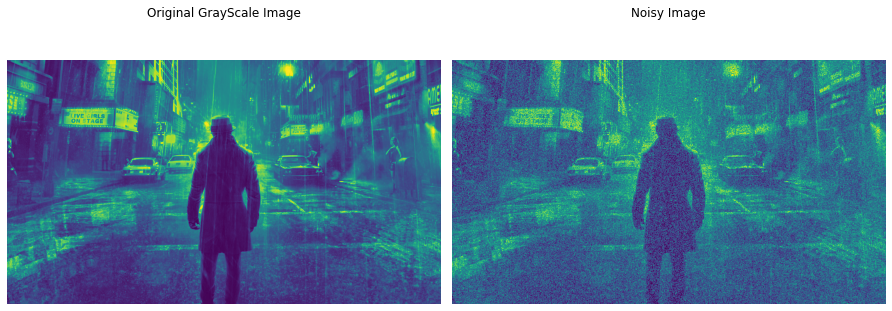

In [422]:
%matplotlib inline
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(gs_image)
ax0.set_title("Original GrayScale Image")
ax0.axis('off')
ax1.imshow(gs_noisy_image)
ax1.set_title('Noisy Image')  
ax1.axis('off')

fig.tight_layout()

#### 2.Calculate the 2D FFT of the noisy image (using an inbuilt function). Display the noisy image's power spectrum in 1D, 2D, 3D and comment on it. What does it reveal about the noise?

Using the function that we built earlier, we will be able to quickly transform the image. After that, we will use the 3d plotting to show all the 3 dimension (imagine you have a cube and you're shown 2 sides and a top-down view).

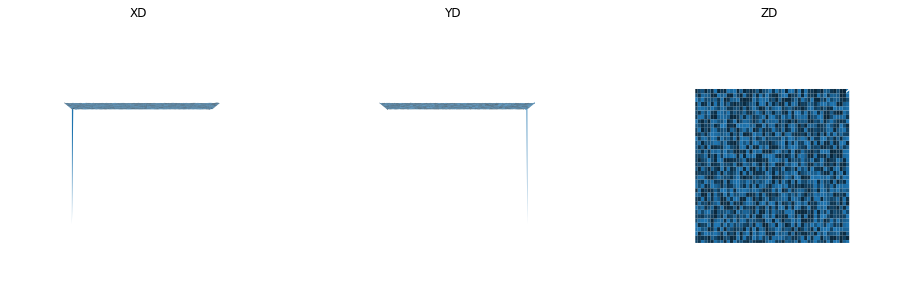

In [423]:
noisy_image_fft2 = np.fft.fft2(gs_noisy_image)

plt.rcParams['figure.figsize'] = [16,16]

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1, projection = '3d')

X,Y = np.meshgrid(np.arange(1, np.shape(noisy_image_fft2)[1]+1), np.arange(1,np.shape(noisy_image_fft2)[0]+1))
ax1.plot_surface(X[0::10, 0::10],Y[0::10,0::10], 256-noisy_image_fft2[0::10,0::10], edgecolor ='none')
ax1.set_title('XD')
ax1.mouse_init()
ax1.view_init(0,0)
ax1.axis('off')

ax2 = fig.add_subplot(1, 3, 2, projection = '3d')
ax2.plot_surface(X[0::10, 0::10],Y[0::10,0::10], 256-noisy_image_fft2[0::10,0::10], edgecolor ='none')
ax2.set_title('YD')
ax2.mouse_init()
ax2.view_init(0,90)
ax2.axis('off')

ax3 = fig.add_subplot(1, 3, 3, projection = '3d')
ax3.plot_surface(X[0::10, 0::10],Y[0::10,0::10], 256-noisy_image_fft2[0::10,0::10], edgecolor ='none')
ax3.set_title('ZD')
ax3.mouse_init()
ax3.view_init(90,90)
ax3.axis('off')

plt.show()



Here we have the same plot in 3 different dimension. X, Y , and Z. All the noise from the image can be seen as the ups and downs that jitter across the YD and XD plot. The top down view from the ZD is what we would see in a 2D plot of the image (an image in itself) after being FFT.

#### 3. Find a way to remove the periodic noise in the frequency domain. Then show the de-noised image (in space) and its power spectrum. Discuss your approach and results.

How to remove noise? That is a great question. The first step would be creating a threshold for the pixels. Basically, I only want to keep the: 5.000%, 1.000%, etc. of the biggest pixels (in other words, largest fourier coefficients). We will se the results below. How will this be achieved? An inverse fourier transformation will have to be done to the matrix we have. We will then proceed with the aforementioned.

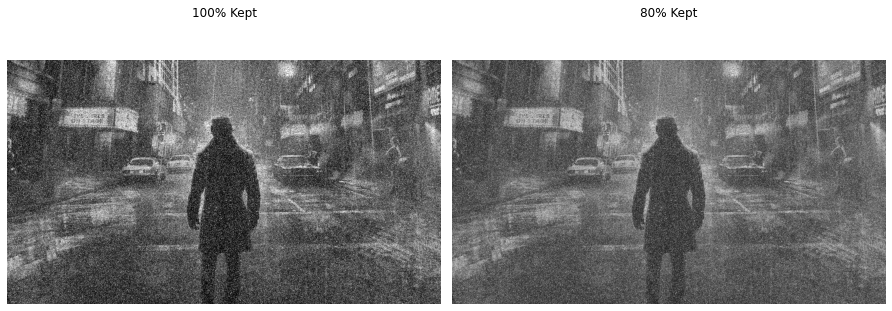

In [424]:
sorted_noisy = np.sort(np.abs(noisy_image_fft2.reshape(-1)))

thresh = sorted_noisy[int(np.floor((1-1)*len(sorted_noisy)))]
ind = np.abs(noisy_image_fft2)>thresh
originallow = noisy_image_fft2 * ind
inverseoriginallow = np.fft.ifft2(originallow).real

thresh1 = sorted_noisy[int(np.floor((1-0.8)*len(sorted_noisy)))]
ind1 = np.abs(noisy_image_fft2)>thresh1
originallow1 = noisy_image_fft2 * ind1
inverseoriginallow1 = np.fft.ifft2(originallow1).real  


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12.5, 5))

ax0.imshow(inverseoriginallow, cmap='gray')
ax0.set_title("100% Kept")
ax0.axis('off')
ax1.imshow(inverseoriginallow1, cmap='gray')
ax1.set_title('80% Kept')  
ax1.axis('off')

fig.tight_layout()   
    

Ta-da! We can see from the image to the right that, altough there is still some noise, the image is way more uniform than when it was if we kept 100% of the pixels after the inverse transformation.